In [2]:
import pandas as pd

# Load your dataset (update the path as necessary)
df = pd.read_csv('earthquakes.csv')

# Display the first few rows of the dataset
print(df.head())


           id  magnitude        type  \
0  us7000necw        4.8  earthquake   
1  tx2024shcj        5.1  earthquake   
2  ci40734823        3.7  earthquake   
3  tx2024scvz        3.9  earthquake   
4  us7000ndte        4.1  earthquake   

                                        title                 date  \
0         M 4.8 - 33 km WSW of Ackerly, Texas  2024-09-17T00:49:42   
1         M 5.1 - 34 km WSW of Ackerly, Texas  2024-09-17T00:49:42   
2                M 3.7 - 6 km N of Malibu, CA  2024-09-16T11:22:08   
3  M 3.9 - 58 km S of Whites City, New Mexico  2024-09-14T17:01:06   
4  M 4.1 - 60 km S of Whites City, New Mexico  2024-09-14T17:01:06   

            time        updated  \
0  1726534182289  1726583895255   
1  1726534182183  1726672002991   
2  1726485728190  1726637414586   
3  1726333266539  1726584426218   
4  1726333266382  1726334616179   

                                                 url  \
0  https://earthquake.usgs.gov/earthquakes/eventp...   
1  https://eart

In [3]:
# Get a summary of the dataset
print(df.info())

# Check for missing values
print(df.isnull().sum())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1137 entries, 0 to 1136
Data columns (total 43 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1137 non-null   object 
 1   magnitude        1137 non-null   float64
 2   type             1137 non-null   object 
 3   title            1137 non-null   object 
 4   date             1137 non-null   object 
 5   time             1137 non-null   int64  
 6   updated          1137 non-null   int64  
 7   url              1137 non-null   object 
 8   detailUrl        1137 non-null   object 
 9   felt             1137 non-null   int64  
 10  cdi              1137 non-null   int64  
 11  mmi              1137 non-null   int64  
 12  alert            764 non-null    object 
 13  status           1137 non-null   object 
 14  tsunami          1137 non-null   int64  
 15  sig              1137 non-null   int64  
 16  net              1137 non-null   object 
 17  code          

In [4]:
# Get descriptive statistics for numerical columns
print(df.describe())



         magnitude          time       updated           felt          cdi  \
count  1137.000000  1.137000e+03  1.137000e+03    1137.000000  1137.000000   
mean      4.856675  1.712109e+12  1.716593e+12     414.408091     2.925242   
std       1.047840  1.143033e+10  9.671955e+09    5746.971362     2.562707   
min       3.000000  1.687542e+12  1.693083e+12       0.000000     0.000000   
25%       3.800000  1.701663e+12  1.707609e+12       0.000000     0.000000   
50%       5.300000  1.713810e+12  1.719958e+12       2.000000     3.000000   
75%       5.600000  1.722885e+12  1.725384e+12      24.000000     5.000000   
max       7.600000  1.726661e+12  1.726672e+12  183786.000000     9.000000   

               mmi      tsunami          sig          nst         dmin  \
count  1137.000000  1137.000000  1137.000000  1137.000000  1137.000000   
mean      4.320141     0.059807   432.698329   115.094107     1.342604   
std       1.453949     0.237232   256.177844    91.877870     1.704364   
m

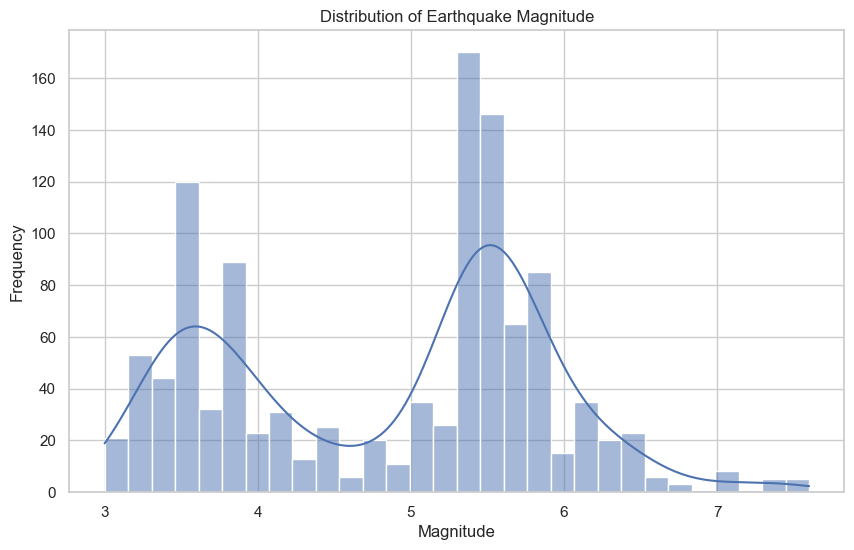

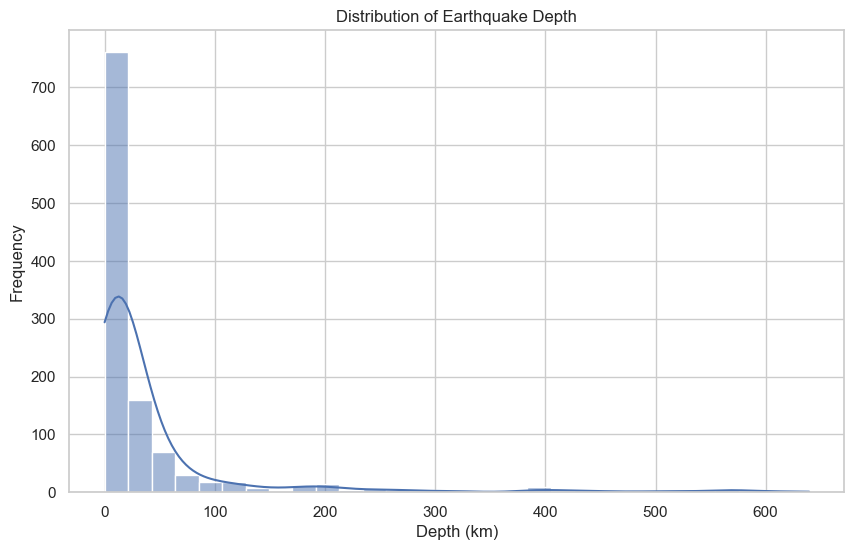

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Plot distribution of magnitude
plt.figure(figsize=(10, 6))
sns.histplot(df['magnitude'], bins=30, kde=True)
plt.title('Distribution of Earthquake Magnitude')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of depth
plt.figure(figsize=(10, 6))
sns.histplot(df['depth'], bins=30, kde=True)
plt.title('Distribution of Earthquake Depth')
plt.xlabel('Depth (km)')
plt.ylabel('Frequency')
plt.show()


C:\Users\perer\AppData\Roaming\Python\Python39\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


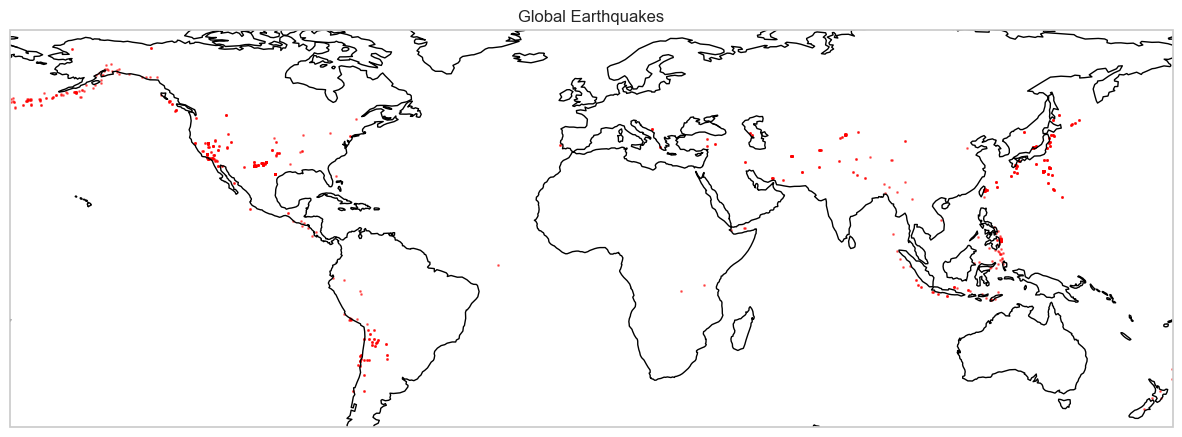

In [7]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Create a new figure with Cartopy
fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

# Plot the earthquakes
ax.scatter(df['longitude'], df['latitude'], color='red', s=1, alpha=0.5, transform=ccrs.PlateCarree())

plt.title('Global Earthquakes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()



In [9]:
import folium
import pandas as pd

# Load your earthquake data
df = pd.read_csv('earthquakes.csv')

# Create a Folium map centered at an average location
map_center = [df['latitude'].mean(), df['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=2)

# Add markers for each earthquake
for _, row in df.iterrows():
    folium.CircleMarker(
        location=(row['latitude'], row['longitude']),
        radius=row['magnitude'],  # You can scale this as needed
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.6,
        popup=f"Location: {row['place']}<br>Magnitude: {row['magnitude']}"
    ).add_to(m)

# Save the map to an HTML file
m.save('earthquake_map.html')


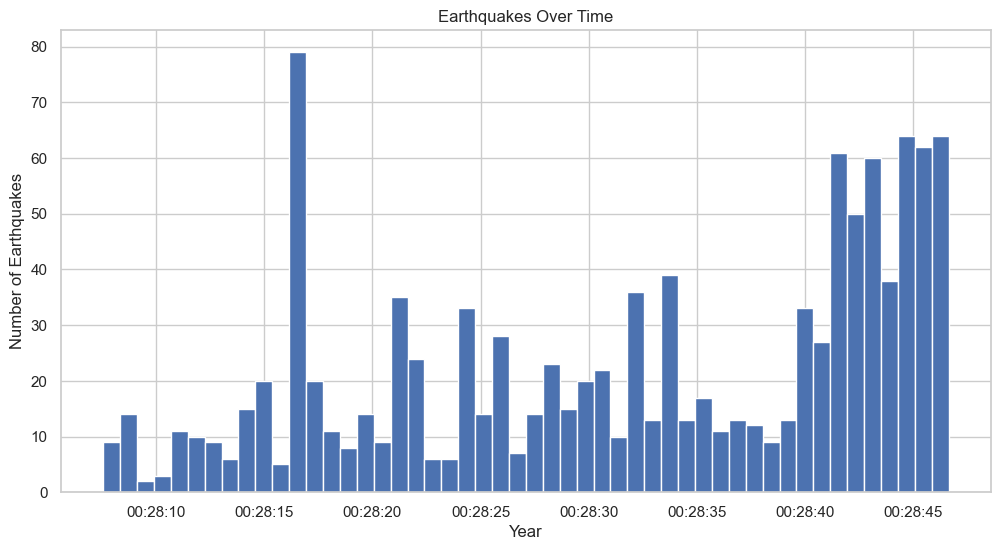

In [10]:
# Convert the 'time' column to datetime format (update according to your column name)
df['time'] = pd.to_datetime(df['time'])

# Plotting earthquakes over time
plt.figure(figsize=(12, 6))
df['time'].hist(bins=50)
plt.title('Earthquakes Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.show()


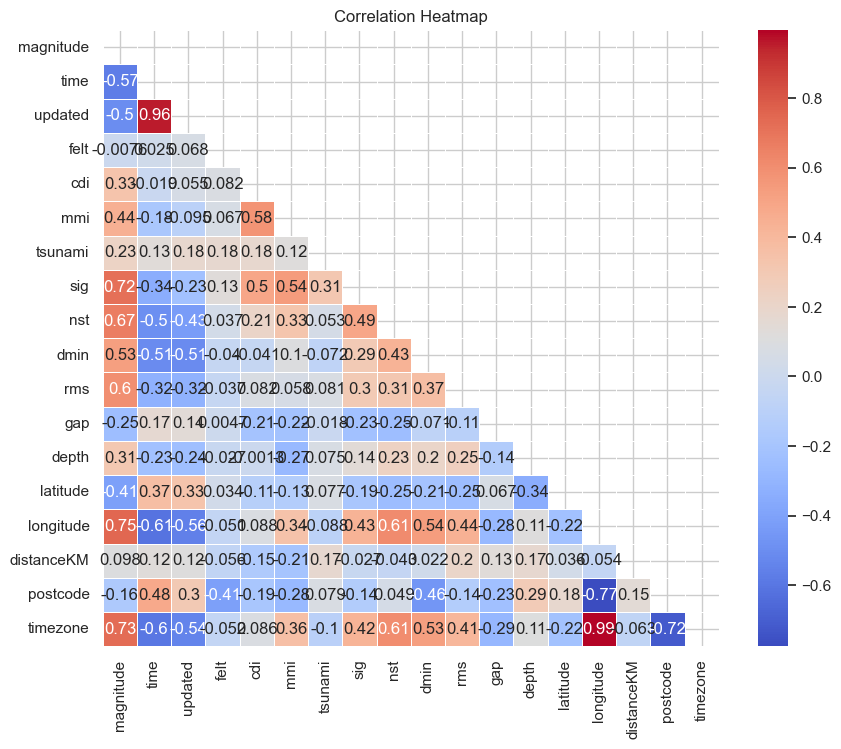

In [15]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv('earthquakes.csv')
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=[float, int])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Set up a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


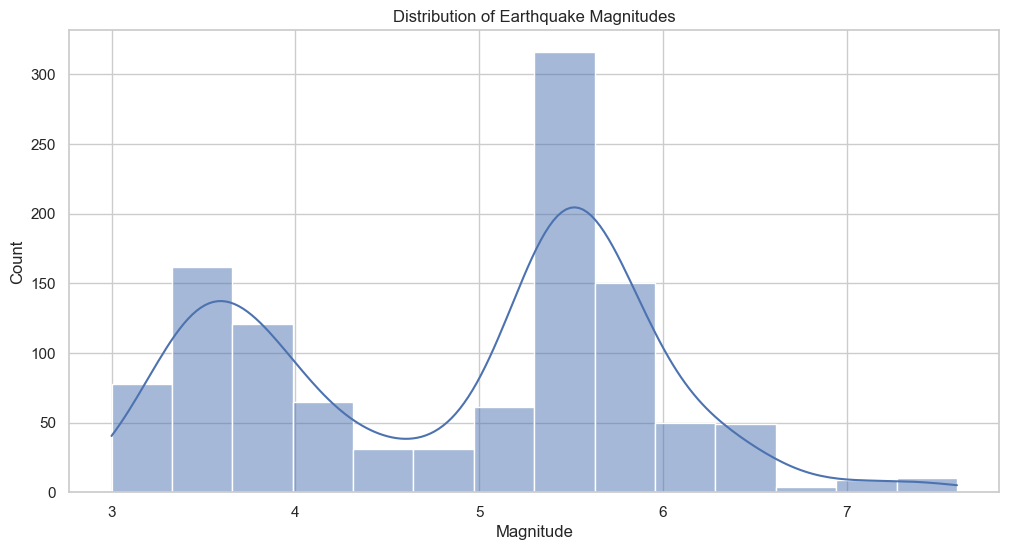

In [16]:
plt.figure(figsize=(12, 6))
sns.histplot(df['magnitude'], kde=True)
plt.title('Distribution of Earthquake Magnitudes')
plt.xlabel('Magnitude')
plt.show()
